In [1]:
import decision_functions as hmd
import pandas as pd
from itertools import combinations
%matplotlib inline

In [2]:
class Decision():
    """
    A class to easily store previous decisions
    """
    def __init__(self):
        self.feature_list = ['feature1', 'feature3', 'feature4', 'feature2']
        self.feature_dict = {'feature1': {'value': 1, 'percent': 0.1},
 'feature3': {'value': 5, 'percent': 0.5},
 'feature4': {'value': 2, 'percent': 0.2},
 'feature2': {'value': 2, 'percent': 0.2}}
        self.option_list = ['option1', 'option2', 'option3', 'option4']
        self.option_dict = {'option1': {'feature1': 3, 'feature3': 9, 'feature4': 8, 'feature2': 4},
 'option2': {'feature1': 7, 'feature3': 7, 'feature4': 1, 'feature2': 3},
 'option3': {'feature1': 4, 'feature3': 7, 'feature4': 54, 'feature2': 3},
 'option4': {'feature1': 4, 'feature3': 7, 'feature4': 2, 'feature2': 7}}
        self.option_value_df = self.update_option_value_df()
        
    def decide(self):
        self.feature_list = hmd.get_feature_list()
        self.feature_dict = hmd.set_feature_importance(self.feature_list)
        self.option_list = hmd.get_option_list()
        self.option_dict = hmd.rate_each_option(self.feature_list, self.option_list)
        self.option_value_df = self.update_option_value_df()
        
    def update_option_value_df(self):
        return pd.DataFrame.from_dict(self.option_dict).merge(
            pd.DataFrame(self.feature_dict).T, left_index=True, right_index=True)
        
    def update_option_dict(self, feature=None, option=None):
        """
        If the option is not in the keys, option will be added and function will request user input to rate.
        if option is in the keys, option key value pair will be removed.
        
        Parameters
        ----------
        feature: str
            The feature key that will be added or removed. 
            If added, will rate all options on this new feature
        
        option: str
            The key that will be added or removed. 
            If added, will rate all features in this new option
        """
        
        if feature != None:
            try:
                for k in self.option_dict.keys:
                    self.option_dict[k].pop(feature)
            except:
                self.option_dict.update(hmd.rate_each_option([feature], self.option_list))
        
        elif option != None:
            try:
                self.option_dict.pop(option)            
            except:
                self.option_dict.update(hmd.rate_each_option(self.feature_list, [option]))
        
        print(self.option_dict)
        self.update_option_value_df(self)
        return
    
    def update_option_list(self, option):
        """
        If option is not in the list, option will be added to list
        If option is in list, option will be removed.
        
        Parameters
        ----------
        option: str
            the feature that will be added or removed
        """
        try:
            self.option_list.remove(option)
        except:
            self.option_list.append(option)
                                    
        print('New option list:\n', self.option_list)
        
        self.update_option_dict(self, None, option)
        return
    
    def update_feature_dict(self, feature):
        """
        If the feature is not in the keys, feature will be added and function will request user input to rate.
        if feature is in the keys, feature key value pair will be removed.
        
        Parameters
        ----------
        feature: str
            the key that will be added or removed
        """
        try:
            self.feature_dict.pop(feature)
        except:
            self.feature_dict.update(hmd.set_feature_importance([feature]))
        
        print('New feature list:\n', self.feature_list)
        
        self.update_option_dict(self, feature, None)
        return
    
    def update_feature_list(self, feature):
        """
        If feature is not in the list, feature will be added to list
        If feature is in list, feature will be removed.
        
        Parameters
        ----------
        feature: str
            the feature that will be added or removed
        """
        try:
            self.feature_list.remove(feature)
        except:
            self.feature_list.append(feature)
                                    
        print('New feature list:\n', self.feature_list)
        
        self.update_feature_dict(self, feature)
        return
    
    def print_results(self):
        hmd.print_scores(self.option_value_df, self.option_list)
        
    def plot_radar(self):
        for pair in list(combinations(self.option_list, 2)):
            hmd.dual_radar_plot(self.option_value_df, pair)
        
    def plot_venn2(self):
        for pair in list(combinations(self.option_list, 2)):
            hmd.create_venn2(self.option_value_df, list(pair))
        
    def plot_venn3(self):
        for triple in list(combinations(self.option_list, 3)):
            hmd.create_venn3(self.option_value_df, list(triple))

In [3]:
abstract = Decision()

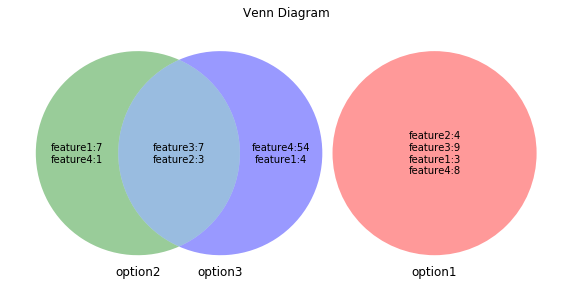

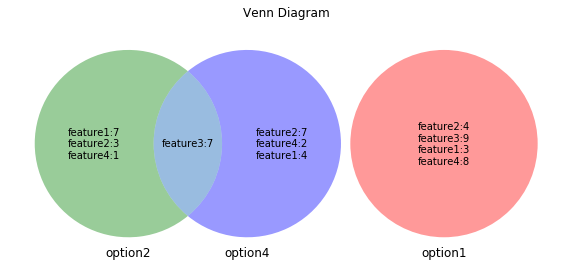

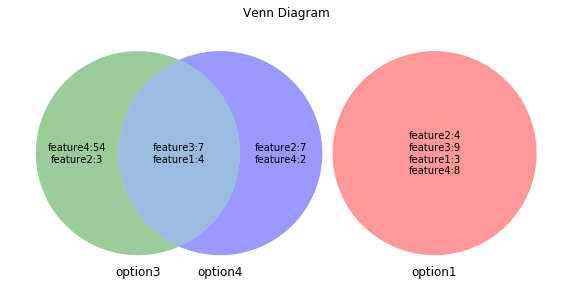

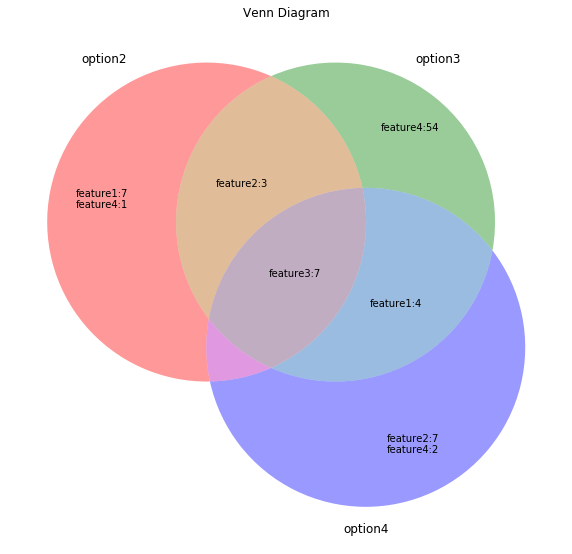

In [4]:
abstract.plot_venn3()